##### Trevor Deppermann and Jessie Kong
CSE 5524 - 12:45 PM

### CSE 5524 – Virtual Drum Kit Project

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage
from skimage import io
from skimage import filters
import matplotlib.patches as patches

In [2]:
# Show desired image
def display(im):
    plt.figure()
    io.imshow(im, cmap='gray')
    plt.show()

In [3]:
# Load images
images = []
images_color = []
for i in range(0, 90):
    # Read in frames in grayscale
    images_color.append(io.imread('frames/drums_video' + str(i).zfill(4) + '.png'))
    images.append(skimage.color.rgb2gray(images_color[i]))

In [4]:
# NCC template matching, which we leverage to find drums and drumsticks
def ncc(search, template, top=False, bottom=False, left=False, right=False):
    # Save dimensions of template and search images
    t_rows, t_cols = template.shape
    rows, cols = search.shape
    # Calculate number of rows above and columns left of patch center
    row_offset = t_rows // 2
    col_offset = t_cols // 2

    similarities = []

    # Calculate mean intensity value for template pixels
    t_vals = template.flatten()
    t_bar = np.mean(t_vals)
    t_std = np.std(t_vals, ddof=1)

    # Store NCC denominator, by which we divide values to get NCC result
    ncc_denom = 3 * (t_rows * t_cols - 1)

    # Iterate through all possible patches
    row_max = rows
    row_min = 0
    col_max = cols
    col_min = 0
    if top:
        row_max = rows // 2
    if bottom:
        row_min = rows // 5
    if left:
        col_max = cols // 2
    if right:
        col_min = cols // 2
        
    for center_row in range(row_min+row_offset, row_max-row_offset):
        for center_col in range(col_min+col_offset, col_max-col_offset):
            # Grab desired patch
            patch = search[center_row-row_offset:center_row+row_offset+1, center_col-col_offset:center_col+col_offset+1]
            p_vals = patch.flatten()

            # Calculate patch mean and standard deviation
            p_bar = np.mean(p_vals)
            p_std = np.std(p_vals, ddof=1)

            # Compute NCC similarity value
            if t_std != 0 and p_std != 0:
                new_vals = ((p_vals - p_bar) * (t_vals - t_bar)) / (p_std * t_std)
                ncc_val = np.sum(new_vals) / ncc_denom
            else:
                ncc_val = 0

            # Store NCC value with patch center
            similarities.append([ncc_val, center_row, center_col])

        # Print progress
        if (row_max-row_offset-center_row) % 200 == 0:
            print("Rows remaining: ", row_max-row_offset-center_row)

    # Get coordinates best match
    cr = similarities[np.argmax(similarities, axis=0)[0]][1]
    cc = similarities[np.argmax(similarities, axis=0)[0]][2]

    coords = {
        'row-min': cr - row_offset,
        'row-max': cr + row_offset + 1,
        'col-min': cc - col_offset,
        'col-max': cc + col_offset + 1
    }

    # Display best match
    display(search[coords['row-min']:coords['row-max'], coords['col-min']:coords['col-max']])

    # Return coordinates of best match
    return coords
    

Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


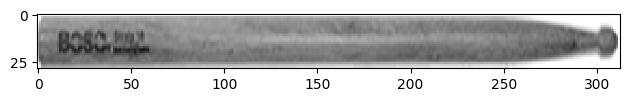

Light Drumstick Region: {'row-min': 111, 'row-max': 140, 'col-min': 100, 'col-max': 413}
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


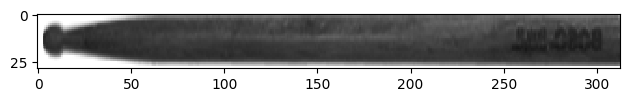

Dark Drumstick Region: {'row-min': 112, 'row-max': 141, 'col-min': 1185, 'col-max': 1498}


In [5]:
# Load in templates for light and dark drumsticks
template_light_color = io.imread('original_images/drumstick_light.png')[:, :, :3]
template_light = skimage.color.rgb2gray(template_light_color)
template_dark_color = io.imread('original_images/drumstick_dark.png')[:, :, :3]
template_dark = skimage.color.rgb2gray(template_dark_color)

# Perform NCC template matching for light drumstick
light_coords = ncc(images[0], template_light, top=True)
print('Light Drumstick Region:', light_coords)

# Perform NCC template matching for dark drumstick
dark_coords = ncc(images[0], template_dark, top=True)
print('Dark Drumstick Region:', dark_coords)

Rows remaining:  1000
Rows remaining:  800
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


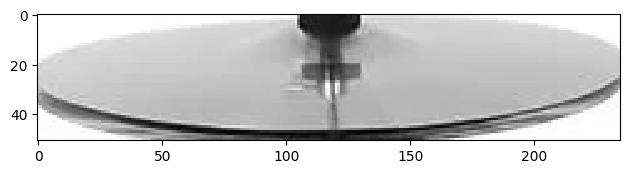

Hi-hat Region: {'row-min': 432, 'row-max': 483, 'col-min': 182, 'col-max': 417}
Rows remaining:  1000
Rows remaining:  800
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


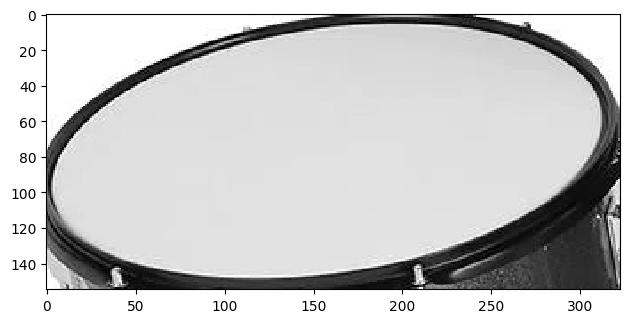

Snare Region: {'row-min': 584, 'row-max': 739, 'col-min': 70, 'col-max': 393}
Rows remaining:  1000
Rows remaining:  800
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


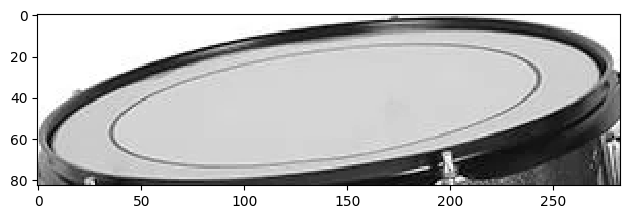

Left Tom Region:  {'row-min': 428, 'row-max': 511, 'col-min': 431, 'col-max': 714}


In [6]:
# Find left-side drum kit components

# Load in templates for snare, hihat, and left-tom drums
template_hihat = skimage.color.rgb2gray(io.imread('original_images/hihat.jpeg')[:, :, :3])
template_snare = skimage.color.rgb2gray(io.imread('original_images/snare.jpeg')[:, :, :3])
template_lefttom = skimage.color.rgb2gray(io.imread('original_images/lefttom.jpeg')[:, :, :3])

# Get hihat region
hihat_coords = ncc(images[0], template_hihat, bottom=True, left=True)
print('Hi-hat Region:', hihat_coords)

# Get snare region
snare_coords = ncc(images[0], template_snare, bottom=True, left=True)
print('Snare Region:', snare_coords)

# Get left tom region
lefttom_coords = ncc(images[0], template_lefttom, bottom=True, left=True)
print('Left Tom Region: ', lefttom_coords)

Rows remaining:  1000
Rows remaining:  800
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


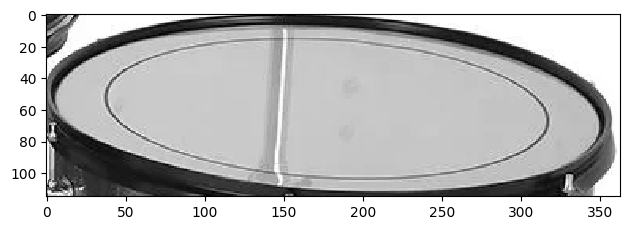

Floor Tom Region: {'row-min': 682, 'row-max': 797, 'col-min': 1103, 'col-max': 1466}
Rows remaining:  1000
Rows remaining:  800
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


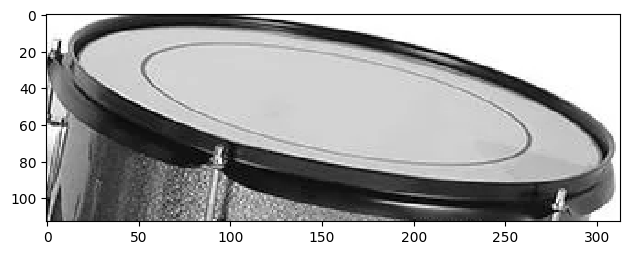

Right Tom Region: {'row-min': 401, 'row-max': 514, 'col-min': 857, 'col-max': 1170}
Rows remaining:  1200
Rows remaining:  1000
Rows remaining:  800
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


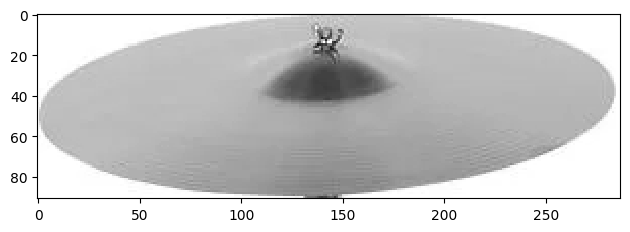

Crash Region:  {'row-min': 231, 'row-max': 322, 'col-min': 1131, 'col-max': 1418}


In [7]:
# Find right-side drum kit components

# Load in templates for snare, hihat, and left-tom drums
template_floortom = skimage.color.rgb2gray(io.imread('original_images/floortom.jpeg')[:, :, :3])
template_righttom = skimage.color.rgb2gray(io.imread('original_images/righttom.jpeg')[:, :, :3])
template_crash = skimage.color.rgb2gray(io.imread('original_images/crash.jpeg')[:, :, :3])

# Get floor tom region
floortom_coords = ncc(images[0], template_floortom, bottom=True, right=True)
print('Floor Tom Region:', floortom_coords)

# Get right tom region
righttom_coords = ncc(images[0], template_righttom, bottom=True, right=True)
print('Right Tom Region:', righttom_coords)

# Get crash region
crash_coords = ncc(images[0], template_crash, right=True)
print('Crash Region: ', crash_coords)


In [8]:
def gauss_deriv_2d(sigma):
    size = math.ceil(3*sigma)
    origin = math.floor(size/2)
    Gx = np.fromfunction(lambda y,x: (-(x-origin)/(2*np.pi*(sigma**4)))*np.exp((-((x-origin)**2+(y-origin)**2)/(2*sigma**2))), (size,size), dtype = float)
    Gy = Gx.transpose()
    #normalize Gx and Gy
    Gx /= np.sum(np.abs(Gx))
    Gy /= np.sum(np.abs(Gy))
    return Gx,Gy

In [9]:
# Use Harris detector to find interest points
def harrisDetector(image, template, top_r, left_c):
    sigma = 0.7
    Gx, Gy = gauss_deriv_2d(sigma)
    gxIm = scipy.ndimage.convolve(image, Gx, mode='nearest')
    gyIm = scipy.ndimage.convolve(image, Gy, mode='nearest')
    #get image derivatives
    gxImSquared = gxIm*gxIm
    gyImSquared = gyIm*gyIm
    gxGy = gxIm*gyIm

    #blur image derivates
    Ix = filters.gaussian(gxImSquared, sigma=1)
    Iy = filters.gaussian(gyImSquared, sigma=1)
    IxIy = filters.gaussian(gxGy, sigma=1)

    #calculate R
    alpha = 0.0005
    R = (Ix*Iy) - (IxIy**2) - alpha*(Ix+Iy)**2

    #set threshold 
    RThreshold = np.copy(R)
    RThreshold [RThreshold < .000001 ] = 0  
    plt.imshow(RThreshold, cmap='gray')
    plt.title("Harris Detector with Threshold")
    plt.show()
    #get index of max value in RThreshold (drumstick tip)
    index = np.argmax(RThreshold)
    #get coordinates of index
    drumstick_tip = np.unravel_index(index, RThreshold.shape) 

    #display the corner point detected
    plt.imshow(image, cmap='gray')
    plt.scatter(drumstick_tip[1], drumstick_tip[0], c='r', s=60) 
    plt.title('Point in Template')
    plt.show()
    # Calculate number of rows above and columns left of patch center
    t_rows, t_cols = template.shape
    row_offset = t_rows // 2
    col_offset = t_cols // 2
    row_val = top_r + drumstick_tip[0]
    col_val = left_c + drumstick_tip[1]
    return row_val, col_val

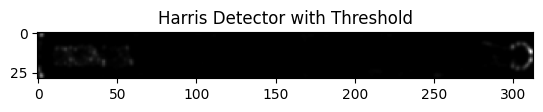

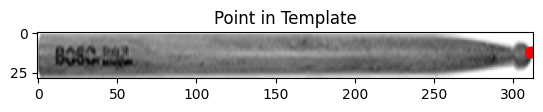

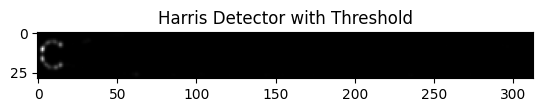

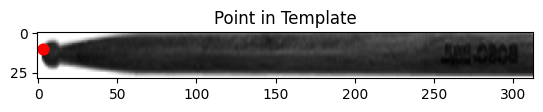

In [10]:
# Get patches for light and dark drumsticks
light_patch_im = images[0][light_coords['row-min']:light_coords['row-max'], light_coords['col-min']:light_coords['col-max']]
dark_patch_im = images[0][dark_coords['row-min']:dark_coords['row-max'], dark_coords['col-min']:dark_coords['col-max']]

# Get interesting points for light and dark drumsticks
light_tip_r, light_tip_c = harrisDetector(light_patch_im, template_light, light_coords['row-min'], light_coords['col-min'])
dark_tip_r, dark_tip_c = harrisDetector(dark_patch_im, template_dark, dark_coords['row-min'], dark_coords['col-min'])

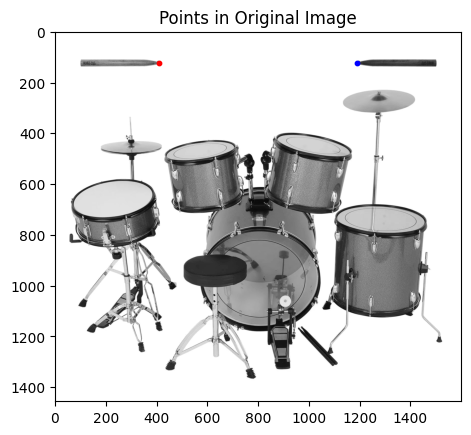

In [11]:
# Display the points detected on full image
plt.imshow(images[0], cmap='gray')
plt.scatter(light_tip_c, light_tip_r, c='r', s=10) 
plt.scatter(dark_tip_c, dark_tip_r, c='b', s=10) 
plt.title('Points in Original Image')
plt.show()

In [12]:
# Helper methods for mean-shift tracking

# Return bin index based on bounds and value
def get_bin(lower_bounds, val):
    for i in range(len(lower_bounds)-1, -1, -1):
        if val >= lower_bounds[i]:
            return i
    return -1

# Return feature matrix for pixels in neighborhood
def circularNeighbors(img, x, y, radius):
    # Store fk value for each pixel in neighborhood
    fk_matrix = np.empty((0, 5), int)

    # Iterate through possible neighborhood pixels, instead of all image pixels
    for i in range(math.floor(x) - radius, math.ceil(x) + radius):
        for j in range(math.floor(y) - radius, math.ceil(y) + radius):
            # Calculate distance from center
            dist = math.sqrt(pow(i - x, 2) + pow(j - y, 2))
            # Ensure distance is less than radius
            if dist < radius:
                # Extract pixel color components
                r, g, b = img[i, j]
                # Calculate feature vector and add to matrix
                fk = [i, j, r, g, b]
                fk_matrix = np.vstack((fk_matrix, np.array(fk)))

    return fk_matrix
    
# Return histogram cube
def colorHistogram(X, bins, r, c, h):
    # Initialize histogram
    hist = np.zeros((bins, bins, bins))

    # Determine lower bounds of each histogram bin
    bin_lower_bounds = np.linspace(0, 256, bins+1)[:-1]

    # Iterate through all pixels of neighborhood
    for i in range(len(X)):
        rgb = X[i, 2:]
        # Calculate weight
        r_dist = r - X[i][0]
        c_dist = c - X[i][1]
        epan_val = pow(math.sqrt(r_dist**2 + c_dist**2) / h, 2)

        if epan_val < 1:
            epan_val = 1 - epan_val
        else:
            epan_val = 0

        # Determine bin for color component
        r_bin = get_bin(bin_lower_bounds, rgb[0])
        g_bin = get_bin(bin_lower_bounds, rgb[1])
        b_bin = get_bin(bin_lower_bounds, rgb[2])

        hist[r_bin, g_bin, b_bin] += epan_val

    # Normalize histogram
    hist /= np.sum(hist)

    return hist

# Return vector of pixel weights
def meanshiftWeights(X, q_model, p_test, bins):
    # Determine size of each histogram bin
    bounds = np.linspace(0, 256, bins + 1)[:-1]

    # Store weight for each pixel in neighborhood
    w = []

    # Iterate through all bins
    for i in range(len(X)):
        val = X[i, 2:]
        # Find bin of current pixel, then update weight
        r = get_bin(bounds, val[0])
        g = get_bin(bounds, val[1])
        b = get_bin(bounds, val[2])
        wi = math.sqrt(q_model[r, g, b] / p_test[r, g, b])
        # Add pixel weight to vector
        w.append(wi)

    return w

In [13]:
# Use mean-shift tracking to find location of object in new frame
def meanshiftTrack(old_im, new_im, loc, bins, radius, h):
  
    # Build model histogram
    model_cn = circularNeighbors(old_im, loc[0], loc[1], radius)
    model_hist = colorHistogram(model_cn, bins, loc[0], loc[1], h)
    
    # Perform mean-shift tracking on new image a certain number of times
    for iterations in range(35):
        candidate_cn = circularNeighbors(new_im, loc[0], loc[1], radius)
        candidate_hist = colorHistogram(candidate_cn, bins, loc[0], loc[1], h)
        w = meanshiftWeights(candidate_cn, model_hist, candidate_hist, bins)
    
        # Perform mean shift - find next best location
        numerator = np.zeros(2)
        denominator = 0
        for i in range(len(candidate_cn)):
            numerator = numerator + w[i] * candidate_cn[i, :2]
            denominator += w[i]
    
        # Update location
        loc = numerator / denominator
        
    return loc


In [14]:
# Use mean-shift tracking to return location of desired object in each frame
def get_locations(im_seq, initial_row, initial_col):
    
    # Initialize list of locations per im_seq frame, to be returned
    locations = np.zeros((len(im_seq), 2))

    # Set parameters for mean-shift tracking
    radius = 40
    h = 40
    bins = 16

    # Set initial location
    loc = [initial_row, initial_col]
    locations[0] = loc
    print("0", loc)

    # Iterate through each image frame
    for im_num in range(1, len(im_seq)):

        loc = meanshiftTrack(im_seq[im_num-1], im_seq[im_num], loc, bins, radius, h)
        
        # Print results
        print(im_num, loc)

        # Save final location for frame
        locations[im_num] = loc

    return locations

In [15]:
# Use mean-shift tracking to return location of desired object in each frame, including points of re-tracking for light drumstick
def get_light_locations(im_seq, initial_row, initial_col, template):
    
    # Initialize list of locations per im_seq frame, to be returned
    locations = np.zeros((len(im_seq), 2))

    # Set parameters for mean-shift tracking
    radius = 40
    h = 40
    bins = 16

    # Set initial location
    loc = [initial_row, initial_col]
    locations[0] = loc
    print("0", loc)
    
    # Display image with identified circle
    fig, ax = plt.subplots()
    circ = patches.Circle((loc[1], loc[0]), radius, linewidth=2, edgecolor='green', facecolor='none')
    ax.add_patch(circ)
    plt.imshow(im_seq[0], cmap='gray')
    plt.show()
    
    # Iterate through each image frame
    for im_num in range(1, len(im_seq)):

        loc = meanshiftTrack(im_seq[im_num-1], im_seq[im_num], loc, bins, radius, h)
        
        # Print results
        print(im_num, loc)

        # Re-perform NCC tracking
        if im_num == 25:
            coords = ncc(skimage.color.rgb2gray(im_seq[im_num]), skimage.color.rgb2gray(template), left=True, top=True)
            loc = [coords['row-min'] + 25, coords['col-min'] + 100]
        if im_num == 82:
            coords = ncc(skimage.color.rgb2gray(im_seq[im_num]), skimage.color.rgb2gray(template), left=True, top=True)
            loc = [coords['row-min'], coords['col-min'] + 100]
    
        # Save final location for frame
        locations[im_num] = loc

        if im_num % 5 == 0:
            # Display image with identified circle
            fig, ax = plt.subplots()
            prev_circ = patches.Circle((locations[im_num-1][1], locations[im_num-1][0]), radius, linewidth=2, edgecolor='darkseagreen', facecolor='none')
            circ = patches.Circle((loc[1], loc[0]), radius, linewidth=2, edgecolor='green', facecolor='none')
            ax.add_patch(prev_circ)
            ax.add_patch(circ)
            plt.imshow(im_seq[im_num], cmap='gray')
            plt.show()
            prev_loc = loc

    return locations

In [16]:
# Use mean-shift tracking to return location of desired object in each frame, including points of re-tracking for dark drumstick
def get_dark_locations(im_seq, initial_row, initial_col, template):
    
    # Initialize list of locations per im_seq frame, to be returned
    locations = np.zeros((len(im_seq), 2))

    # Set parameters for mean-shift tracking
    radius = 40
    h = 40
    bins = 16

    # Set initial location
    loc = [initial_row, initial_col]
    locations[0] = loc
    print("0", loc)
    
    # Display image with identified circle
    fig, ax = plt.subplots()
    circ = patches.Circle((loc[1], loc[0]), radius, linewidth=2, edgecolor='green', facecolor='none')
    ax.add_patch(circ)
    plt.imshow(im_seq[0], cmap='gray')
    plt.show()
    
    # Iterate through each image frame
    for im_num in range(1, len(im_seq)):

        loc = meanshiftTrack(im_seq[im_num-1], im_seq[im_num], loc, bins, radius, h)
        
        # Print results
        print(im_num, loc)

        # Re-perform NCC tracking
        if im_num == 38:
            coords = ncc(skimage.color.rgb2gray(im_seq[im_num]), skimage.color.rgb2gray(template), right=True, top=True)
            loc = [coords['row-min'] + 25, coords['col-min'] + 200]
    
        # Save final location for frame
        locations[im_num] = loc

        if im_num % 5 == 0:
            # Display image with identified circle
            fig, ax = plt.subplots()
            prev_circ = patches.Circle((locations[im_num-1][1], locations[im_num-1][0]), radius, linewidth=2, edgecolor='darkseagreen', facecolor='none')
            circ = patches.Circle((loc[1], loc[0]), radius, linewidth=2, edgecolor='green', facecolor='none')
            ax.add_patch(prev_circ)
            ax.add_patch(circ)
            plt.imshow(im_seq[im_num], cmap='gray')
            plt.show()

    return locations

0 [123, 136]


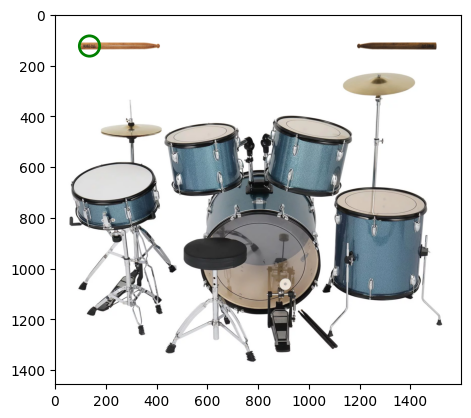

1 [146.16721117 154.2311548 ]
2 [173.71769437 174.44955524]
3 [200.85362853 197.49625655]
4 [228.60375515 219.64587354]
5 [255.75059257 243.86705501]


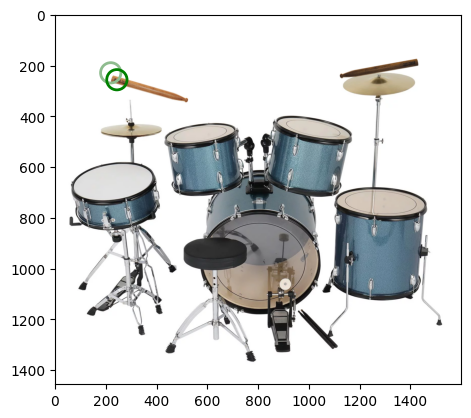

6 [282.73659346 268.28037353]
7 [307.19633788 294.73167942]
8 [330.83001072 323.86453182]
9 [325.67862069 315.64361616]
10 [311.70843647 305.44210607]


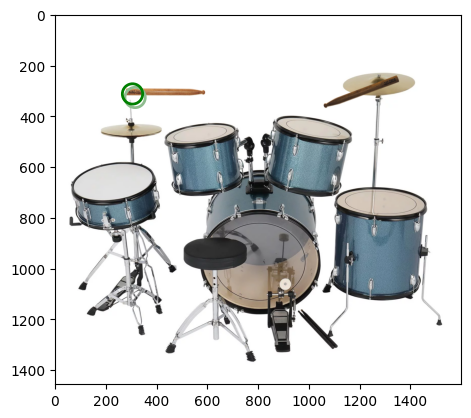

11 [297.39162109 307.75863446]
12 [277.36262907 311.07477764]
13 [277.56159572 311.5179131 ]
14 [277.57992121 311.52525245]
15 [277.78633881 311.52861373]


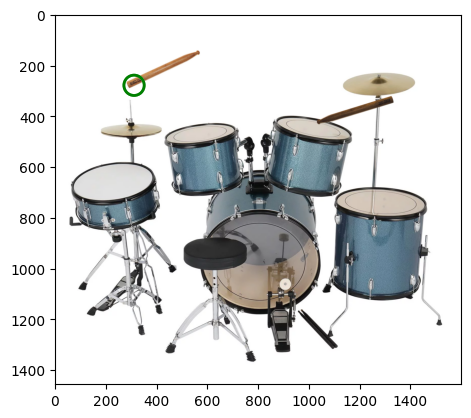

16 [277.64454158 311.60703756]
17 [277.6457404  311.58067176]
18 [278.21510998 313.24152165]
19 [278.47057351 313.58647452]
20 [278.55538452 313.83717062]


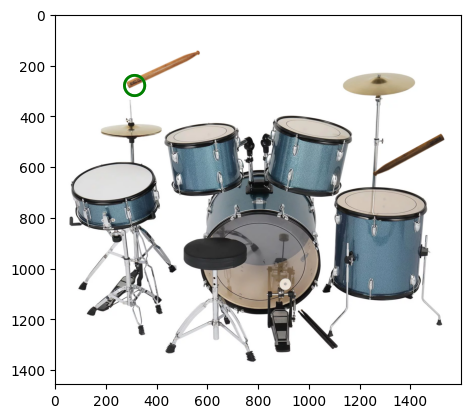

21 [278.61706565 315.72313363]
22 [278.63502394 315.7710423 ]
23 [296.5724037  295.79833169]
24 [296.59667348 295.35059472]
25 [296.5 295.5]
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


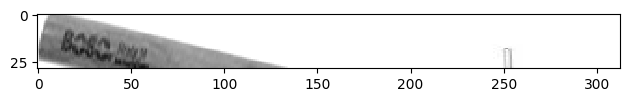

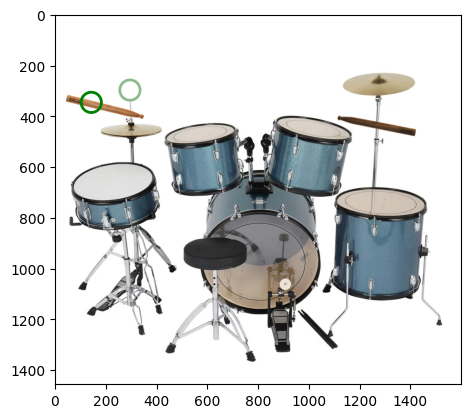

26 [362.521641   140.52987994]
27 [379.70410136 137.62251981]
28 [394.90614522 134.97668204]
29 [413.57389815 132.55464576]
30 [431.78261689 131.16346289]


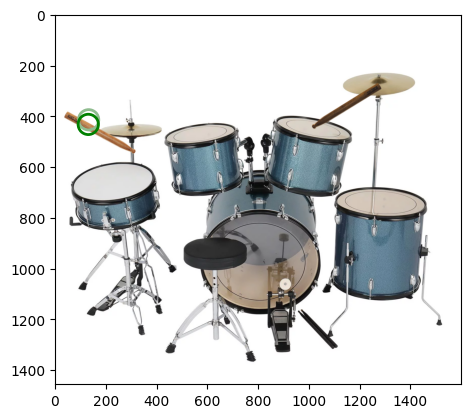

31 [448.78740335 128.63379743]
32 [466.7993533  127.52073754]
33 [484.47563334 125.67133795]
34 [502.57386475 124.41104594]
35 [531.37422492 106.90235409]


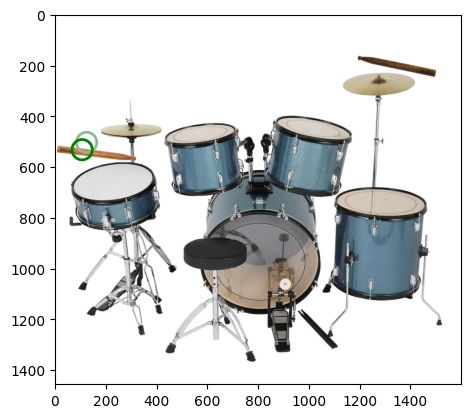

36 [563.6073001  109.04693793]
37 [558.95782687 108.23775991]
38 [554.42067825 107.35632244]
39 [550.19562553 107.45267798]
40 [545.54148874 107.37107649]


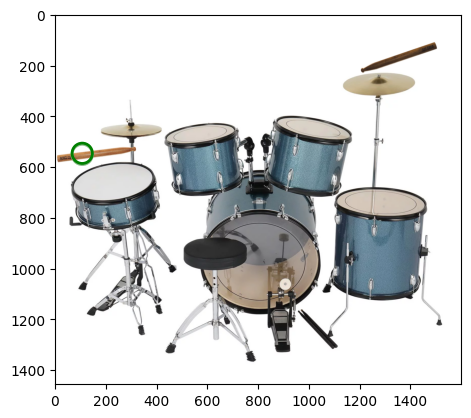

41 [541.20633793 107.62391341]
42 [536.69813528 108.99560221]
43 [532.47492312 110.50900241]
44 [528.43916767 112.79343427]
45 [524.36827017 114.77421109]


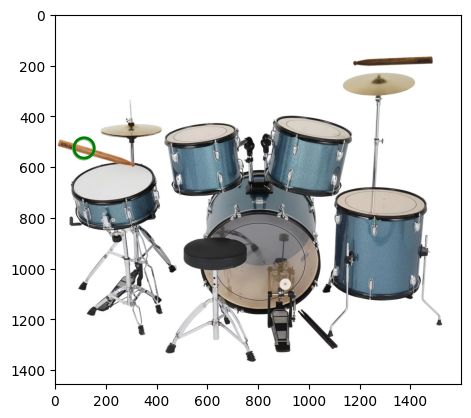

46 [520.40682852 116.64597044]
47 [516.26889599 118.73984125]
48 [513.43171044 121.49370379]
49 [510.66343184 125.33601593]
50 [507.63683227 128.58069593]


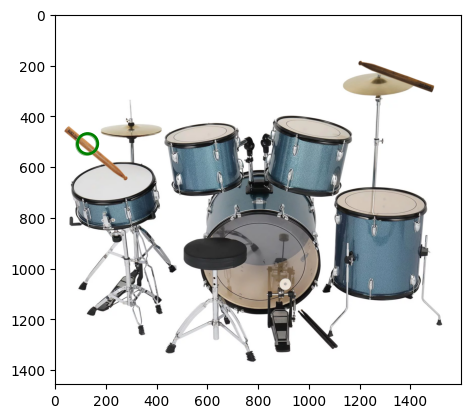

51 [521.65232872 118.18499624]
52 [537.57519255 116.46303401]
53 [551.50720423 115.16121649]
54 [531.24096315 131.60931439]
55 [488.33194186 140.42894826]


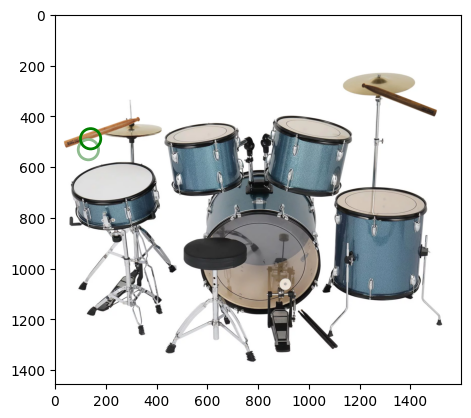

56 [445.45292059 146.27761687]
57 [418.20456555 145.62307023]
58 [392.38636709 152.18525439]
59 [401.42076216 152.42463036]
60 [423.66203698 157.20431401]


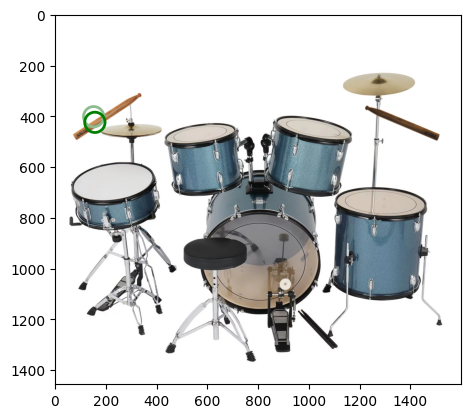

61 [433.7067994  168.63595731]
62 [444.84618471 167.88746493]
63 [464.38808114 160.5923958 ]
64 [478.45124025 154.55014019]
65 [490.14603634 163.00536339]


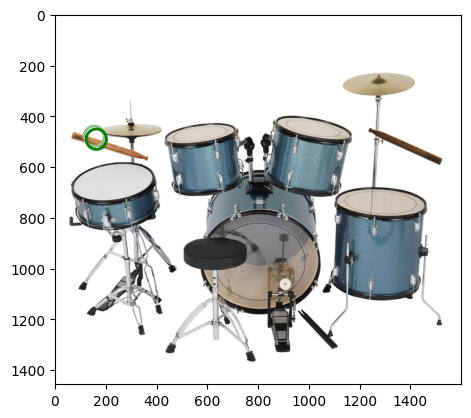

66 [503.25786929 178.00269103]
67 [526.48852328 162.12815502]
68 [553.39780851 158.39494001]
69 [518.35126228 164.83089204]
70 [518.5 164.5]


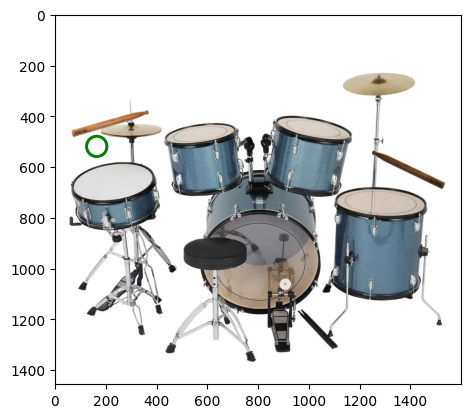

71 [518.5 164.5]
72 [518.5 164.5]
73 [518.5 164.5]
74 [518.5 164.5]
75 [546.64126542 179.74452845]


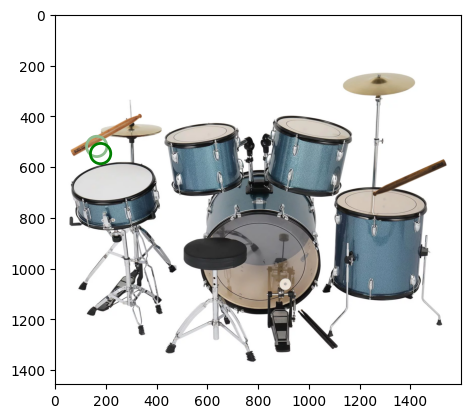

76 [509.11286847 150.22709667]
77 [508.89807241 150.07999458]
78 [508.74345747 149.83775512]
79 [508.49485788 149.49623056]
80 [508.48339016 149.48763775]


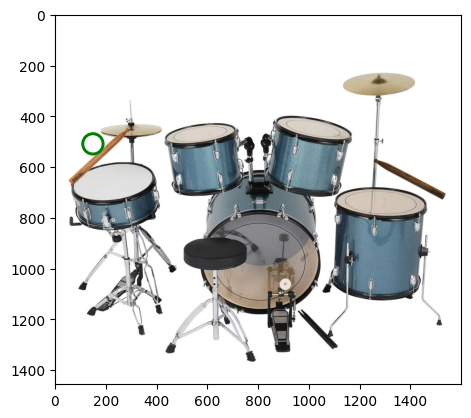

81 [508.30869926 149.37631293]
82 [508.5 149.5]
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


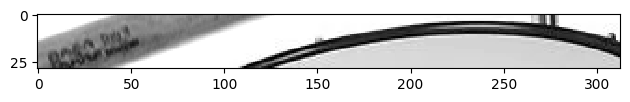

83 [569.07432561 136.33594105]
84 [552.30222271 136.06046239]
85 [566.91516122 138.21783447]


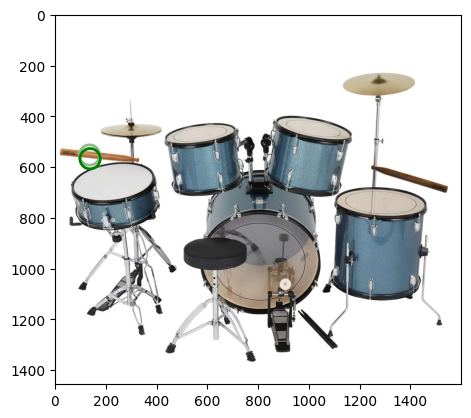

86 [566.44598843 140.83264101]
87 [566.4779518  140.72073394]
88 [566.50413169 140.54393025]
89 [566.50248786 140.5036247 ]


In [17]:
light_stick_locations = get_light_locations(images_color, light_tip_r, light_tip_c-275, template_light_color)

0 [122, 1463]


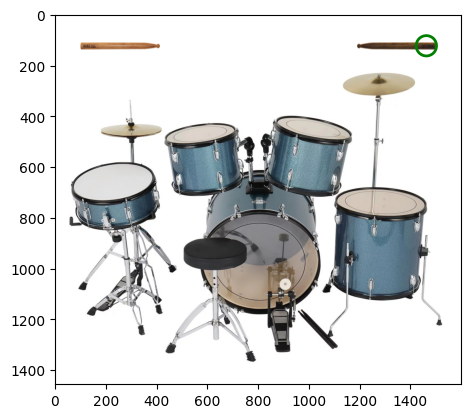

1 [ 131.32499539 1452.81797669]
2 [ 145.50474982 1441.24649172]
3 [ 159.59179893 1429.26242612]
4 [ 173.48774225 1416.14583107]
5 [ 187.30224978 1401.55083746]


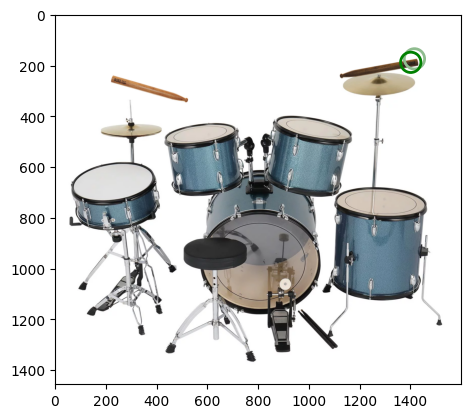

6 [ 200.7675279  1388.30251868]
7 [ 206.66030265 1374.20513279]
8 [ 215.55157292 1358.21107418]
9 [ 224.58166247 1348.59748643]
10 [ 228.43052266 1337.20994227]


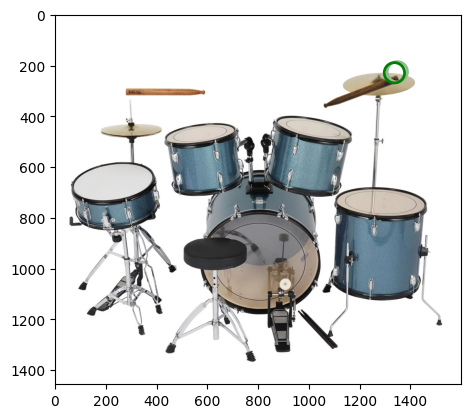

11 [ 230.65047502 1322.83921319]
12 [ 229.0706344  1320.84199579]
13 [ 229.07267631 1320.86114059]
14 [ 229.07229765 1320.86319773]
15 [ 229.07202733 1320.86344696]


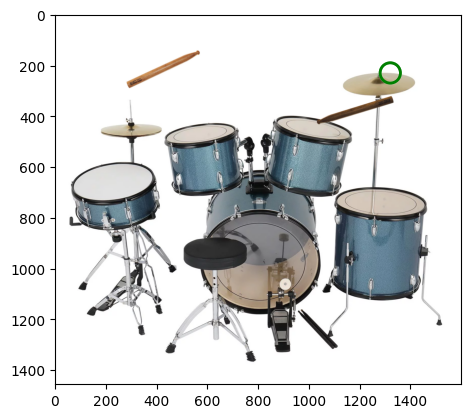

16 [ 229.07190787 1320.86349071]
17 [ 229.07185908 1320.86350274]
18 [ 229.07183951 1320.86350701]
19 [ 229.07183169 1320.86350866]
20 [ 229.07182857 1320.86350932]


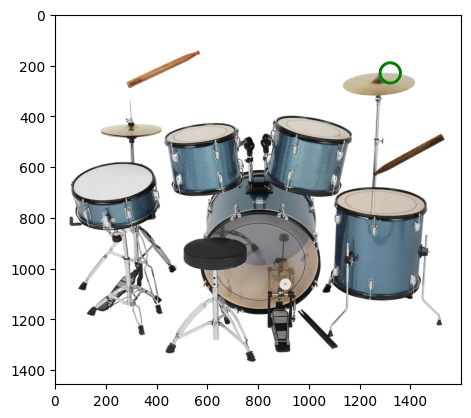

21 [ 229.07182733 1320.86350958]
22 [ 229.07182683 1320.86350968]
23 [ 229.07182663 1320.86350972]
24 [ 229.07182655 1320.86350974]
25 [ 229.07182652 1320.86350974]


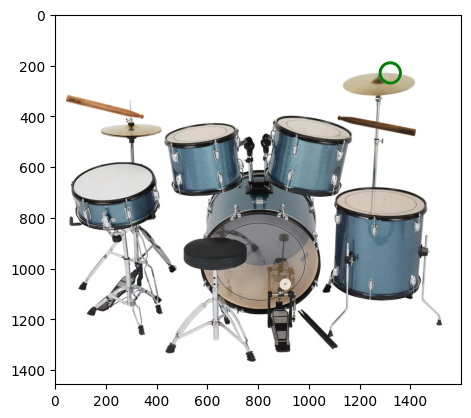

26 [ 229.07182651 1320.86350975]
27 [ 229.07182651 1320.86350975]
28 [ 229.0718265  1320.86350975]
29 [ 229.0718265  1320.86350975]
30 [ 229.0718265  1320.86350975]


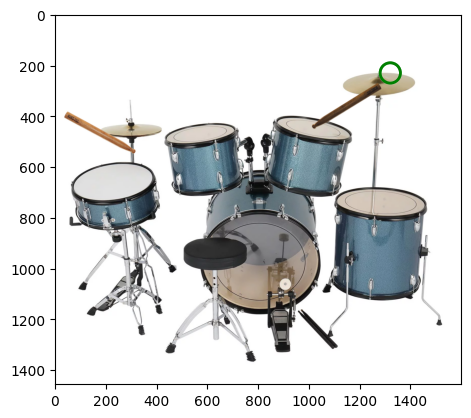

31 [ 229.0718265  1320.86350975]
32 [ 229.0718265  1320.86350975]
33 [ 229.0718265  1320.86350975]
34 [ 223.1829883  1337.11864668]
35 [ 230.39772691 1313.41714334]


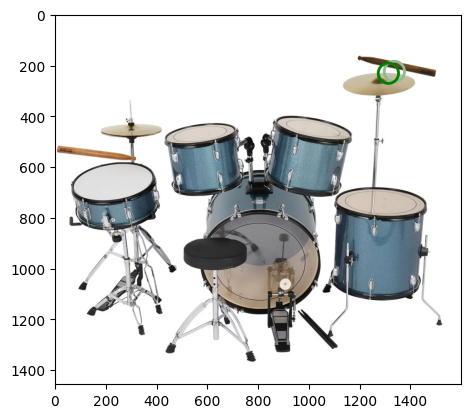

36 [ 233.78850703 1308.62213211]
37 [ 233.74269391 1308.59586129]
38 [ 233.70228444 1308.57131152]
Rows remaining:  600
Rows remaining:  400
Rows remaining:  200


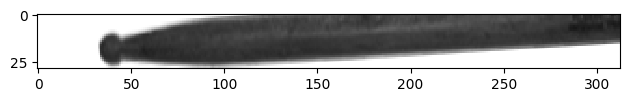

39 [ 180.62338104 1385.84924967]
40 [ 181.55699013 1381.11207623]


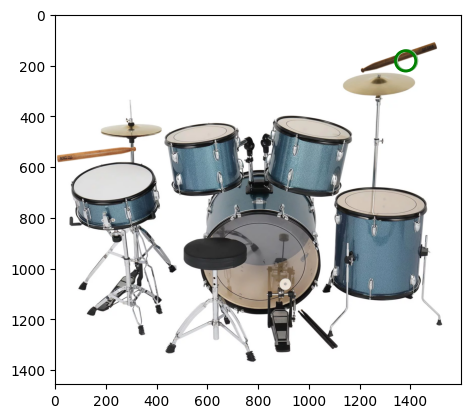

41 [ 179.75690876 1376.54054157]
42 [ 178.63634265 1364.94221708]
43 [ 187.40323724 1367.55411408]
44 [ 196.05026408 1369.87253761]
45 [ 203.04808135 1371.25433519]


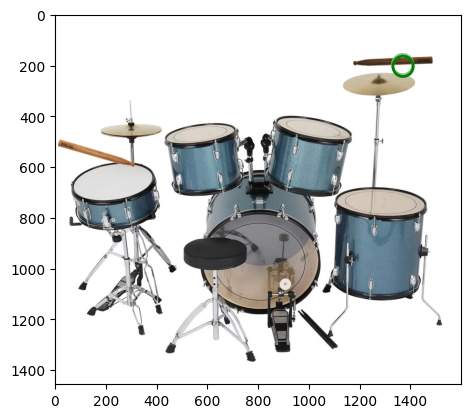

46 [ 206.77659327 1370.46383879]
47 [ 208.16724342 1369.43677895]
48 [ 210.42920611 1372.64840249]
49 [ 220.41421242 1369.41536813]
50 [ 232.61816244 1365.71320887]


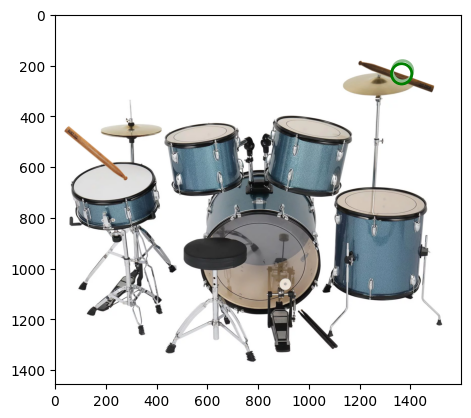

51 [ 226.72670937 1319.10815926]
52 [ 228.34667224 1283.7563615 ]
53 [ 229.14658338 1253.37876584]
54 [ 235.39204175 1240.67696438]
55 [ 233.64535748 1244.42004769]


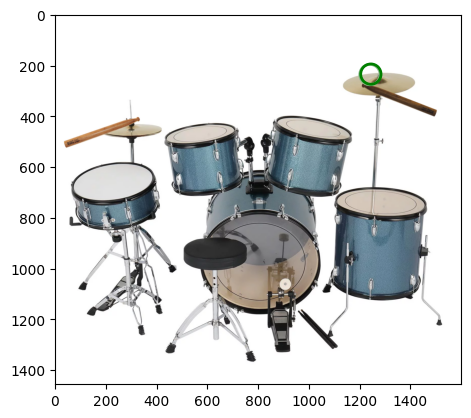

56 [ 233.57593167 1244.48978592]
57 [ 233.54476376 1244.50185181]
58 [ 233.51529178 1244.50340559]
59 [ 233.50541874 1244.5015421 ]
60 [ 233.5019444  1244.50059275]


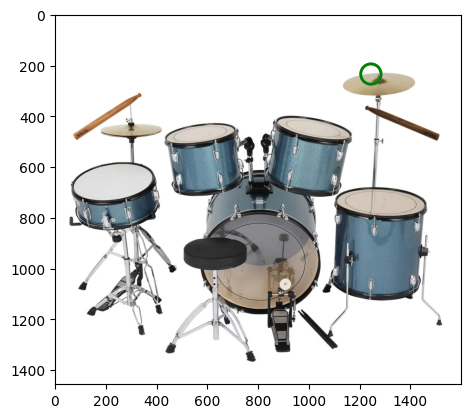

61 [ 233.50070056 1244.50021815]
62 [ 233.50025275 1244.50007923]
63 [ 233.50009122 1244.50002866]
64 [ 233.50003293 1244.50001035]
65 [ 233.50001189 1244.50000374]


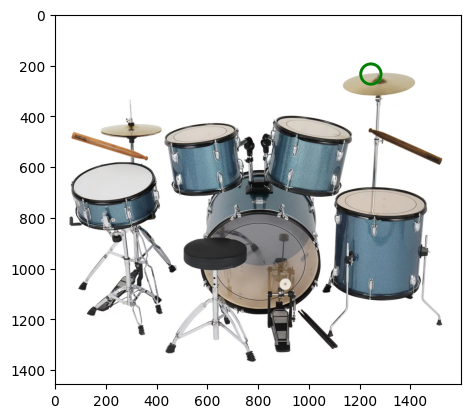

66 [ 233.50000429 1244.50000135]
67 [ 233.50000155 1244.50000049]
68 [ 233.50000056 1244.50000018]
69 [ 233.5000002  1244.50000006]
70 [ 233.50000007 1244.50000002]


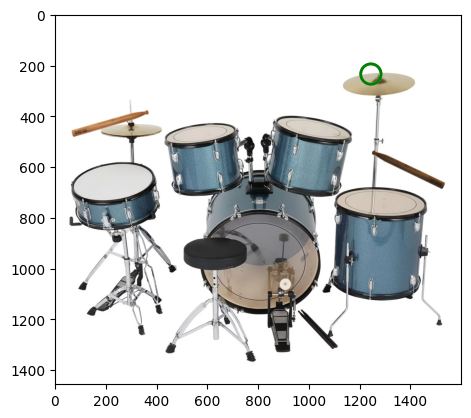

71 [ 233.50000003 1244.50000001]
72 [ 233.50000001 1244.5       ]
73 [ 233.5 1244.5]
74 [ 233.5 1244.5]
75 [ 233.5 1244.5]


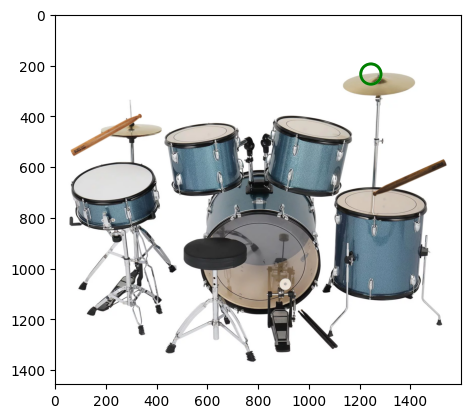

76 [ 233.5 1244.5]
77 [ 233.5 1244.5]
78 [ 233.5 1244.5]
79 [ 233.5 1244.5]
80 [ 233.5 1244.5]


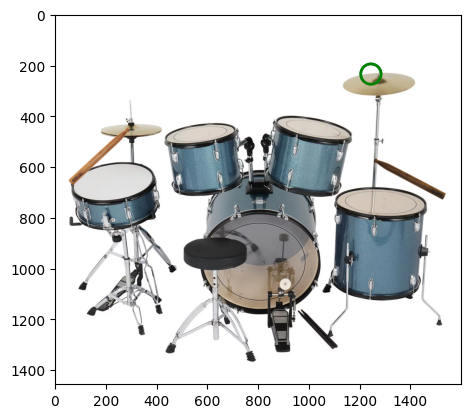

81 [ 233.5 1244.5]
82 [ 233.5 1244.5]
83 [ 233.5 1244.5]
84 [ 233.5 1244.5]
85 [ 233.5 1244.5]


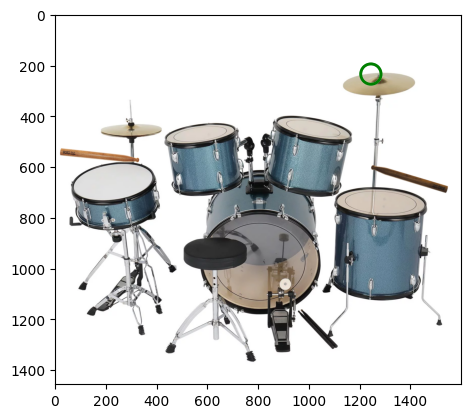

86 [ 233.5 1244.5]
87 [ 233.5 1244.5]
88 [ 233.5 1244.5]
89 [ 233.5 1244.5]


In [18]:
dark_stick_locations = get_dark_locations(images_color, dark_tip_r, dark_tip_c+275, template_dark_color)

In [19]:
# Get light drumstick tip locations for first 15 frames
light_drumtip_locations = get_locations(images_color[:15], light_tip_r, light_tip_c)

0 [123, 411]
1 [142.91235334 416.40389645]
2 [142.5 416.5]
3 [142.5 416.5]
4 [142.5 416.5]
5 [142.5 416.5]
6 [142.5 416.5]
7 [142.5 416.5]
8 [142.5 416.5]
9 [142.5 416.5]
10 [142.5 416.5]
11 [142.5 416.5]
12 [142.5 416.5]
13 [142.5 416.5]
14 [142.5 416.5]


In [20]:
# Get dark drumstick tip locations for first 15 frames
dark_drumtip_locations = get_locations(images_color[:15], dark_tip_r, dark_tip_c)

0 [122, 1188]
1 [ 125.62050386 1188.32982111]
2 [ 144.62337983 1185.20499471]
3 [ 165.56713538 1178.75480735]
4 [ 187.02587401 1171.66129206]
5 [ 208.66926639 1159.87120841]
6 [ 230.4838283  1148.34290711]
7 [ 254.64902921 1122.00425734]
8 [ 278.90143379 1103.15858868]
9 [ 297.32150387 1101.68652554]
10 [ 317.25355094 1095.43318944]
11 [ 337.76297635 1086.38704073]
12 [ 357.58599982 1079.05971314]
13 [ 375.96216266 1072.13710921]
14 [ 390.18172015 1072.5479723 ]


Frame 0
Red coordinates: 123.0 , 411.0
Blue coordinates: 122.0 , 1188.0


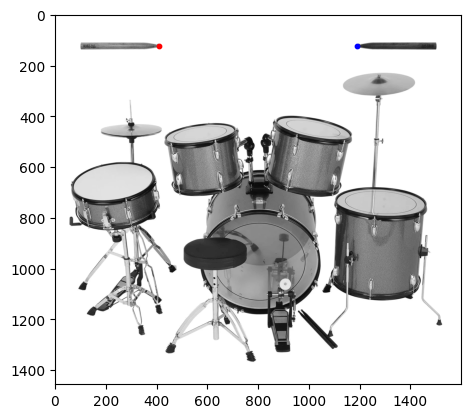

Frame 1
Red coordinates: 142.91235333567997 , 416.4038964454936
Blue coordinates: 125.62050386300125 , 1188.3298211110036


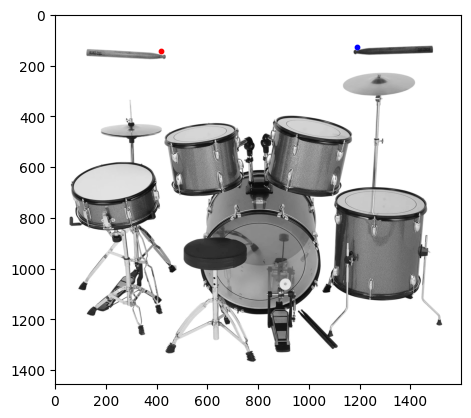

Frame 2
Red coordinates: 142.4999999999967 , 416.4999999999931
Blue coordinates: 144.62337983052467 , 1185.2049947077635


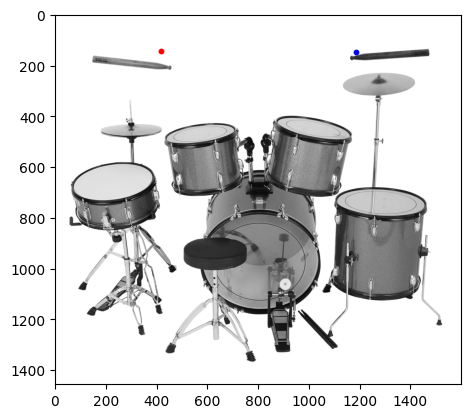

Frame 5
Red coordinates: 142.5 , 416.5
Blue coordinates: 208.6692663890269 , 1159.8712084071947


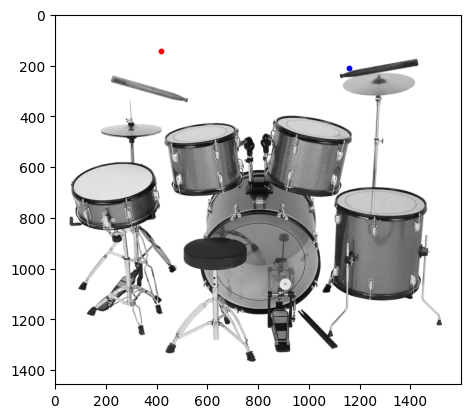

Frame 9
Red coordinates: 142.5 , 416.5
Blue coordinates: 297.32150386786026 , 1101.686525541156


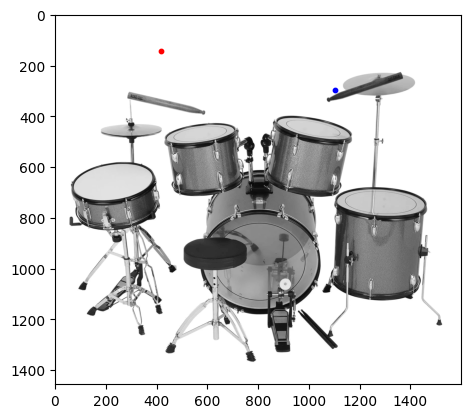

Frame 12
Red coordinates: 142.5 , 416.5
Blue coordinates: 357.58599982222313 , 1079.059713142837


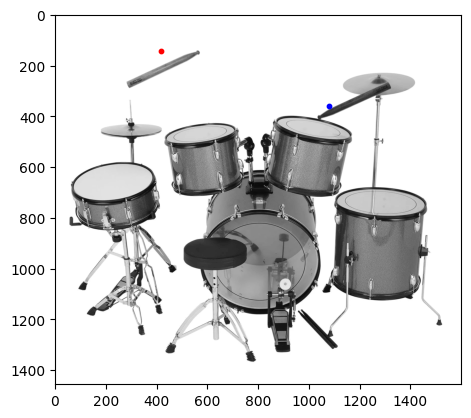

In [21]:
# Display points detected
frames = [0, 1, 2, 5, 9, 12]
for f in frames:
    plt.imshow(images[f], cmap='gray')
    plt.scatter(light_drumtip_locations[f][1],light_drumtip_locations[f][0], c='r', s=10) 
    plt.scatter(dark_drumtip_locations[f][1],dark_drumtip_locations[f][0], c='b', s=10) 
    print("Frame", f)
    print("Red coordinates:", light_drumtip_locations[f][0], ",", light_drumtip_locations[f][1])
    print("Blue coordinates:", dark_drumtip_locations[f][0], ",", dark_drumtip_locations[f][1])
    plt.show()